## Develop an application for the classification of images and report the performance analysis.

https://www.kaggle.com/datasets/dataclusterlabs/indian-food-image-dataset

### 1. Load your dataset and print its size

In [ ]:
import warnings
warnings.filterwarnings("ignore") 

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import cv2
import os

from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

In [ ]:
datadir = "/content/sample_data/Images"
categories = ['Snacks', 'Sweets']
data = []
img_size=500

for category in categories:
    path = os.path.join(datadir, category)
    class_num = categories.index(category)
    
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
        num_array = cv2.resize(img_array,(img_size, img_size))
        
        data.append([num_array, class_num])

print("Images are loaded, converted to gray-scale and are resized.")

Images are loaded, converted to gray-scale and are resized.


In [ ]:
X = []
y = []

for features,label in data:
    X.append(features)
    y.append(label)

X = np.asarray(X)
y = np.asarray(y)

print("Shape of the following:")
print("X =", X.shape, "\ny =", y.shape)

Shape of the following:
X = (20, 500, 500) 
y = (20,)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print("Shape of the following:")
print("X_train =", X_train.shape, "\nX_test =", X_test.shape, "\ny_train =", y_train.shape, "\ny_test =", y_test.shape)

print("\nSize of the following:")
print("X_train =", X_train.size, "\nX_test =", X_test.size, "\ny_train =", y_train.size, "\ny_test =", y_test.size)

Shape of the following:
X_train = (15, 500, 500) 
X_test = (5, 500, 500) 
y_train = (15,) 
y_test = (5,)

Size of the following:
X_train = 3750000 
X_test = 1250000 
y_train = 15 
y_test = 5


### 2. Display at least one image from your dataset"

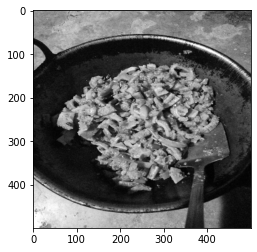

In [ ]:
plt.imshow(X_train[0], cmap='gray')
plt.show()

In [ ]:
y_train[0]

0

### 3. Build your first CNN model

In [ ]:
model = Sequential([
    Conv2D(filters=16, kernel_size=(6,6), activation='relu', input_shape=(500,500,1)),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.25),
    Flatten(),
    Dense(16, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

### 4. Print summary and verify your configuration5

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 495, 495, 16)      592       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 247, 247, 16)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 247, 247, 16)      0         
                                                                 
 flatten (Flatten)           (None, 976144)            0         
                                                                 
 dense (Dense)               (None, 16)                15618320  
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                        

### 5. Compile and fit and validate your model

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['binary_accuracy'])

In [ ]:
history = model.fit(X_train, y_train, validation_split=0.2, epochs=10)

Epoch 1/10
1/1 [==============================] - 3s 3s/step - loss: 20.7940 - binary_accuracy: 0.5000 - val_loss: 3466.7454 - val_binary_accuracy: 0.6667
Epoch 2/10
1/1 [==============================] - 2s 2s/step - loss: 3505.9138 - binary_accuracy: 0.5000 - val_loss: 1206.8031 - val_binary_accuracy: 0.6667
Epoch 3/10
1/1 [==============================] - 2s 2s/step - loss: 1572.3795 - binary_accuracy: 0.5833 - val_loss: 252.6770 - val_binary_accuracy: 0.6667
Epoch 4/10
1/1 [==============================] - 2s 2s/step - loss: 558.0451 - binary_accuracy: 0.7500 - val_loss: 217.3053 - val_binary_accuracy: 0.3333
Epoch 5/10
1/1 [==============================] - 2s 2s/step - loss: 134.0947 - binary_accuracy: 0.6667 - val_loss: 451.3288 - val_binary_accuracy: 0.6667
Epoch 6/10
1/1 [==============================] - 2s 2s/step - loss: 519.6845 - binary_accuracy: 0.6667 - val_loss: 221.6779 - val_binary_accuracy: 0.6667
Epoch 7/10
1/1 [==============================] - 4s 4s/step - loss

In [ ]:
score = model.evaluate(X_test, y_test)
print("Accuracy =", score[1], "\nLoss =", score[0])

1/1 [==============================] - 0s 230ms/step - loss: 26.0718 - binary_accuracy: 0.4000
Accuracy = 0.4000000059604645 
Loss = 26.071847915649414


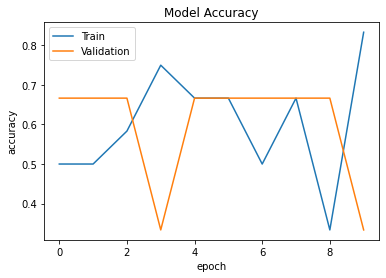

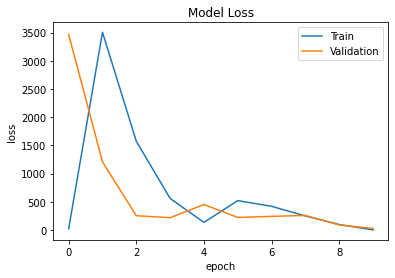

In [ ]:
plt.plot(history.history['binary_accuracy'])
plt.plot(history.history['val_binary_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'])
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'])
plt.show()

### 6. Perform at least 5 improvements for your baseline model

Epoch 1/15
1/1 [==============================] - 4s 4s/step - loss: 13.2114 - binary_accuracy: 0.5833 - val_loss: 326435.3750 - val_binary_accuracy: 0.6667
Epoch 2/15
1/1 [==============================] - 3s 3s/step - loss: 363806.9688 - binary_accuracy: 0.5833 - val_loss: 1756566912.0000 - val_binary_accuracy: 0.3333
Epoch 3/15
1/1 [==============================] - 3s 3s/step - loss: 406494048.0000 - binary_accuracy: 0.5000 - val_loss: 37094420381696.0000 - val_binary_accuracy: 0.6667
Epoch 4/15
1/1 [==============================] - 3s 3s/step - loss: 29740758990848.0000 - binary_accuracy: 0.5000 - val_loss: 0.6933 - val_binary_accuracy: 0.3333
Epoch 5/15
1/1 [==============================] - 3s 3s/step - loss: 2107868.7500 - binary_accuracy: 0.5000 - val_loss: 0.6928 - val_binary_accuracy: 0.6667
Epoch 6/15
1/1 [==============================] - 3s 3s/step - loss: 483064.4062 - binary_accuracy: 0.5000 - val_loss: 0.6929 - val_binary_accuracy: 0.6667
Epoch 7/15
1/1 [=============

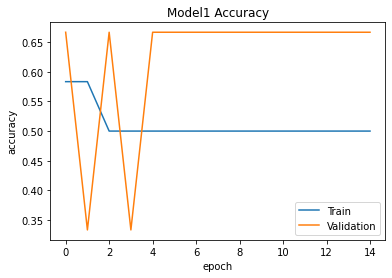

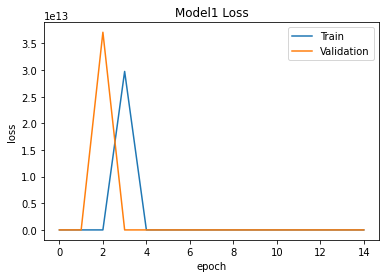

In [ ]:
model1 = Sequential([
    Conv2D(filters=32, kernel_size=(6,6), activation='relu', input_shape=(500,500,1)),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.25),
    Flatten(),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model1.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['binary_accuracy'])

history1 = model1.fit(X_train, y_train, validation_split=0.2, epochs=15)

score1 = model1.evaluate(X_test, y_test)
print("Accuracy =", score1[1], "\nLoss =", score1[0])

plt.plot(history1.history['binary_accuracy'])
plt.plot(history1.history['val_binary_accuracy'])
plt.title('Model1 Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'])
plt.show()

plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('Model1 Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'])
plt.show()

Epoch 1/15
1/1 [==============================] - 4s 4s/step - loss: 31.9118 - binary_accuracy: 0.2500 - val_loss: 2455.0278 - val_binary_accuracy: 0.3333
Epoch 2/15
1/1 [==============================] - 3s 3s/step - loss: 5150.2891 - binary_accuracy: 0.7500 - val_loss: 2839.4280 - val_binary_accuracy: 0.6667
Epoch 3/15
1/1 [==============================] - 3s 3s/step - loss: 5001.8296 - binary_accuracy: 0.5000 - val_loss: 1244.4987 - val_binary_accuracy: 0.6667
Epoch 4/15
1/1 [==============================] - 3s 3s/step - loss: 851.9401 - binary_accuracy: 0.6667 - val_loss: 2561.5227 - val_binary_accuracy: 0.3333
Epoch 5/15
1/1 [==============================] - 3s 3s/step - loss: 2097.9646 - binary_accuracy: 0.6667 - val_loss: 148.9908 - val_binary_accuracy: 0.6667
Epoch 6/15
1/1 [==============================] - 3s 3s/step - loss: 86.1651 - binary_accuracy: 0.7500 - val_loss: 36.4740 - val_binary_accuracy: 0.6667
Epoch 7/15
1/1 [==============================] - 3s 3s/step - los

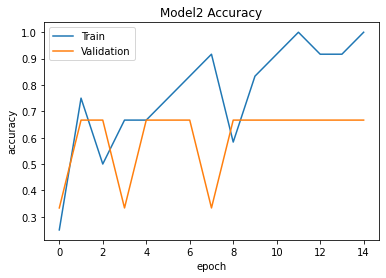

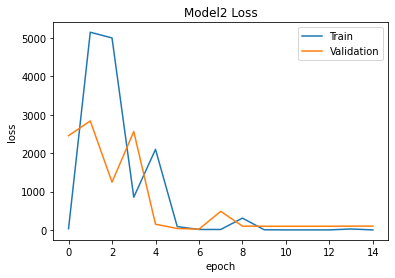

In [ ]:
model2 = Sequential([
    Conv2D(filters=32, kernel_size=(6,6), activation='relu', input_shape=(500,500,1)),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.25),
    Flatten(),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model2.compile(loss='binary_crossentropy', optimizer='RMSprop', metrics=['binary_accuracy'])

history2 = model2.fit(X_train, y_train, validation_split=0.2, epochs=15)

score2 = model2.evaluate(X_test, y_test)
print("Accuracy =", score2[1], "\nLoss =", score2[0])

plt.plot(history2.history['binary_accuracy'])
plt.plot(history2.history['val_binary_accuracy'])
plt.title('Model2 Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'])
plt.show()

plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('Model2 Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'])
plt.show()

Epoch 1/30
1/1 [==============================] - 4s 4s/step - loss: 19.0333 - binary_accuracy: 0.5000 - val_loss: 7252.4453 - val_binary_accuracy: 0.3333
Epoch 2/30
1/1 [==============================] - 3s 3s/step - loss: 5100.3862 - binary_accuracy: 0.5833 - val_loss: 2753.1101 - val_binary_accuracy: 0.6667
Epoch 3/30
1/1 [==============================] - 3s 3s/step - loss: 1253.1017 - binary_accuracy: 0.6667 - val_loss: 2693.2373 - val_binary_accuracy: 0.6667
Epoch 4/30
1/1 [==============================] - 3s 3s/step - loss: 3733.5859 - binary_accuracy: 0.5000 - val_loss: 1221.6300 - val_binary_accuracy: 0.6667
Epoch 5/30
1/1 [==============================] - 3s 3s/step - loss: 5259.7749 - binary_accuracy: 0.3333 - val_loss: 535.6365 - val_binary_accuracy: 0.6667
Epoch 6/30
1/1 [==============================] - 3s 3s/step - loss: 1770.1451 - binary_accuracy: 0.5833 - val_loss: 532.3956 - val_binary_accuracy: 0.3333
Epoch 7/30
1/1 [==============================] - 3s 3s/step -

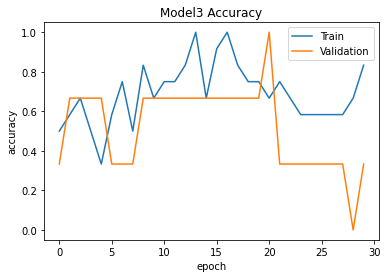

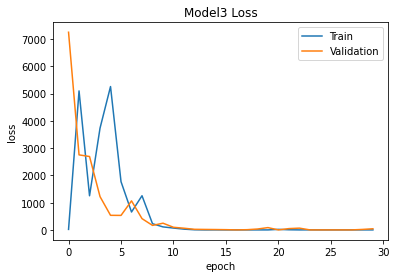

In [ ]:
model3 = Sequential([
    Conv2D(filters=32, kernel_size=(6,6), activation='relu', input_shape=(500,500,1)),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.25),
    Flatten(),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model3.compile(loss='binary_crossentropy', optimizer='adam', metrics=['binary_accuracy'])

history3 = model3.fit(X_train, y_train, validation_split=0.2, epochs=30)

score3 = model3.evaluate(X_test, y_test)
print("Accuracy =", score3[1], "\nLoss =", score3[0])

plt.plot(history3.history['binary_accuracy'])
plt.plot(history3.history['val_binary_accuracy'])
plt.title('Model3 Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'])
plt.show()

plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('Model3 Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'])
plt.show()

### 7. Interpret your results in a tabular format.

In [ ]:
def result(score, score1, score2, score3):
    data = {
        'Model Name': ['Base Model', 'Model 1', 'Model 2', 'Model 3'], 
        'Loss': [score[0], score1[0], score2[0], score3[0]], 
        'Accuracy': [score[1]*100, score1[1]*100, score2[1]*100, score3[1]*100]}
                     
    df_results = pd.DataFrame(data)

    return df_results

In [ ]:
result(score, score1, score2, score3)

,Model Name,Loss,Accuracy
0,Base Model,26.071848,40.000001
1,Model 1,0.693232,40.000001
2,Model 2,1529.613281,40.000001
3,Model 3,0.414428,100.000000
